## Observations and Insights 

In [82]:
#Observations:
## There is a stong correlation between the average mouse weight and tumor size 
##      for mice treated with the Capomulin regimen. This may imply that the drug 
##      regimen works better on leaner mice.
## From the statistics summary, Ramicane and Capomulin have the lowest mean tumor volumes
## These methods may be the best drug remimens to further study as they seem the most effective in this study. 
## However, looking at the bar chart for number of measurements taken, those same drugs also have the most measurements.
## This could imply they were more effective because they administered on the mice longer

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "./Mouse_metadata.csv"
study_results_path = "./Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
merge_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [83]:
# Checking the number of mice.
len(merge_df["Mouse ID"].unique()) #249

249

In [84]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merge_df.head()
duplicate = merge_df[merge_df.duplicated()]
duplicate


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [85]:
# Optional: Get all the data for the duplicate mouse ID. 
merge_df["Mouse ID"] == 'g989'
merge_df.loc[merge_df["Mouse ID"] == "g989", :]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [86]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merge_df.loc[merge_df["Mouse ID"] != "g989", :]
cleaned_df = merge_df.loc[merge_df["Mouse ID"] != "g989", :]
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [87]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_df["Mouse ID"].unique()) #248

248

## Summary Statistics

In [88]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
cleaned_grouped = cleaned_df.groupby("Drug Regimen")
cleaned_grouped["Tumor Volume (mm3)"].mean()
mean_tumor_volumes = cleaned_grouped["Tumor Volume (mm3)"].mean()
median_tumor_volumes = cleaned_grouped["Tumor Volume (mm3)"].median()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

std_tumor_volumes = cleaned_grouped["Tumor Volume (mm3)"].std()
std_tumor_volumes = std_tumor_volumes.fillna(0)
var_tumor_volumes = cleaned_grouped["Tumor Volume (mm3)"].var()
std_error_means = cleaned_grouped["Tumor Volume (mm3)"].sem()
    
stats_summary_df = pd.DataFrame({"Tumor Volume Mean ": mean_tumor_volumes,
                                "Tumor Volume Median": median_tumor_volumes,
                                "Tumor Volume Variance": var_tumor_volumes,
                                "Tumor Volume Standard Deviation": std_tumor_volumes,
                                "Tumor Volume SEM": std_error_means})
stats_summary_df



,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [89]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
cleaned_df[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").agg(['mean', 'median', 'var', 'std', 'sem'])

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

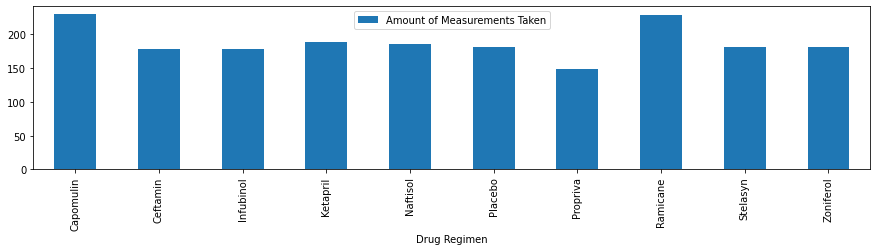

In [90]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
cleaned_df.groupby("Drug Regimen").count()
plot_data = cleaned_df.groupby("Drug Regimen").count()
regimen_and_count = plot_data.iloc[:, 6:]
regimen_and_count = regimen_and_count.rename(columns = {"Metastatic Sites": "Amount of Measurements Taken"})

plot = regimen_and_count.plot(kind = "bar", figsize=(15, 3))



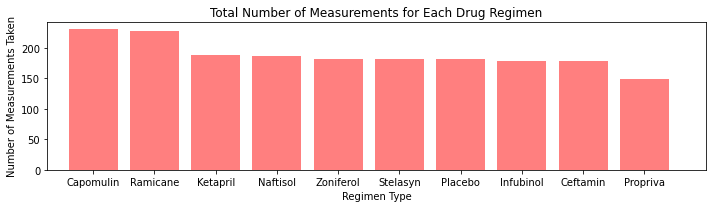

In [91]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
number_of_measurements = cleaned_df["Drug Regimen"].value_counts()
x_axis = np.arange(len(number_of_measurements))
x_axis

tick_locations = [value for value in x_axis]

plt.figure(figsize=(10,3))

plt.bar(x_axis, number_of_measurements, color='r', alpha=0.5, align="center")

plt.title("Total Number of Measurements for Each Drug Regimen")
plt.xlabel("Regimen Type")
plt.ylabel("Number of Measurements Taken")

labels = number_of_measurements.keys()
plt.xticks(tick_locations, labels, rotation="horizontal")

plt.xlim(-0.75, len(x_axis))

plt.tight_layout()
plt.savefig("./num_measurements.png")

array([<AxesSubplot:ylabel='Count per Gender'>], dtype=object)

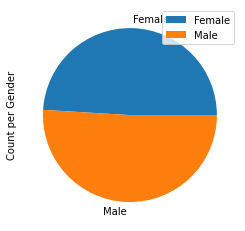

In [92]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
cleaned_df.groupby("Sex").count()
plot_data = cleaned_df.groupby("Sex").count()
sex_and_count = plot_data.iloc[:, 6:]

sex_and_count = sex_and_count.rename(columns = {"Metastatic Sites": "Count per Gender"})
sex_and_count

sex_and_count.plot(kind = "pie", subplots = True)


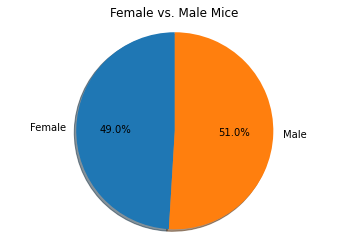

,Count per Gender
Sex,
Female,922
Male,958


In [93]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_and_count

sex = ["Female", "Male"]
count = sex_and_count["Count per Gender"]

plt.title("Female vs. Male Mice")
plt.pie(count, labels = sex,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

sex_and_count



## Quartiles, Outliers and Boxplots

In [94]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
cleaned_df.groupby("Mouse ID")
grouped = cleaned_df.groupby("Mouse ID").max()
greatest_timepoint_per_mouse = grouped["Timepoint"]
greatest_timepoint_df = pd.DataFrame({"Timepoint": greatest_timepoint_per_mouse})
greatest_timepoint_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Count should be 248
# Combine the data into a single dataset
merge_timepoint_df = pd.merge(greatest_timepoint_df, cleaned_df, on=['Mouse ID', "Timepoint"])
merge_timepoint_df

new_df = merge_timepoint_df[["Mouse ID", "Timepoint", "Drug Regimen", "Tumor Volume (mm3)"]]
new_df.loc[(new_df["Drug Regimen"] == 'Capomulin') | 
          (new_df["Drug Regimen"] == 'Ramicane') |
          (new_df["Drug Regimen"] == 'Infubinol') |
          (new_df["Drug Regimen"] == 'Ceftamin')]

final_tumor_volume_df = new_df.loc[(new_df["Drug Regimen"] == 'Capomulin') | 
          (new_df["Drug Regimen"] == 'Ramicane') |
          (new_df["Drug Regimen"] == 'Infubinol') |
          (new_df["Drug Regimen"] == 'Ceftamin')]

final_tumor_volume_df

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,a203,45,Infubinol,67.973419
1,a251,45,Infubinol,65.525743
3,a275,45,Ceftamin,62.999356
6,a411,45,Ramicane,38.407618
7,a444,45,Ramicane,43.047543
...,...,...,...,...
238,y769,45,Ceftamin,68.594745
239,y793,45,Capomulin,31.896238
240,y865,45,Ceftamin,64.729837
244,z578,45,Ramicane,30.638696


In [96]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = final_tumor_volume_df["Drug Regimen"].unique()
treatments

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    df = final_tumor_volume_df.loc[final_tumor_volume_df["Drug Regimen"] == treatment, :]
    tumor_vol_data.append(df["Tumor Volume (mm3)"])
    average_tum_vol = (df["Tumor Volume (mm3)"].mean())
    quartiles = df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"The lower quartile of {treatment} is: {lowerq}")
    print(f"The upper quartile of {treatment} is: {upperq}")
    print(f'The IQR for {treatment} is {iqr}')
    print(' ')
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = df.loc[(df['Tumor Volume (mm3)'] < lower_bound) | (df['Tumor Volume (mm3)'] > upper_bound)]
    count = len(outliers["Mouse ID"])
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print(' ')
    
    if (count > 0):
        print(outliers)
        print(' ')
    print('-----------------------------------------------')
    # add subset 
    
    
    # Determine outliers using upper and lower bounds


The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The IQR for Infubinol is 11.477135160000003
 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
 
   Mouse ID  Timepoint Drug Regimen  Tumor Volume (mm3)
31     c326          5    Infubinol           36.321346
 
-----------------------------------------------
The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The IQR for Ceftamin is 15.577752179999997
 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
 
-----------------------------------------------
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The IQR for Ramicane is 9.098536719999998
 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
 
-----------------------------------------------
The lower quartile of

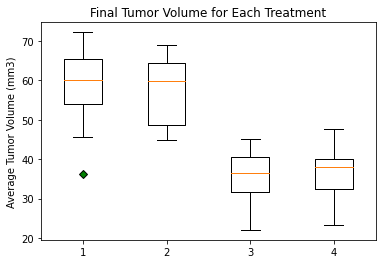

In [107]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_vol_data[0]

green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume for Each Treatment')
ax1.set_ylabel('Average Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data, flierprops=green_diamond)
plt.show()

## Line and Scatter Plots

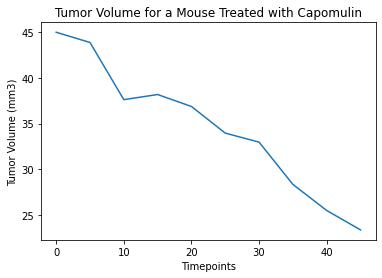

In [34]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_df = cleaned_df[cleaned_df["Drug Regimen"] == 'Capomulin']
mouse = cleaned_df.loc[cleaned_df["Mouse ID"] == 's185', :]

tumor_volume = mouse["Tumor Volume (mm3)"]
timepoints = mouse["Timepoint"]
timepoints

plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume for a Mouse Treated with Capomulin")

plt.plot(timepoints, tumor_volume)
plt.show()

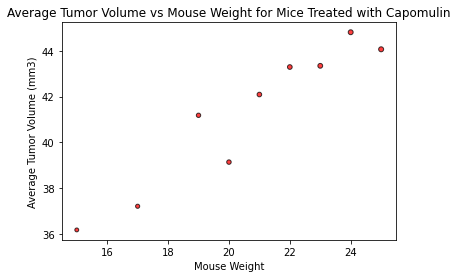

In [71]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_grouped = cap_df.groupby("Weight (g)")
data = cap_grouped["Tumor Volume (mm3)"].mean()

x_axis = data.keys()

plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)

plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs Mouse Weight for Mice Treated with Capomulin")
plt.show()




## Correlation and Regression

In [53]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x_axis,data)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.95


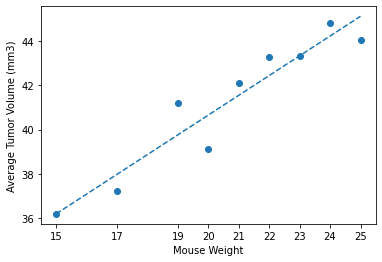

In [78]:
mw_slope, mw_int, mw_r, mw_p, mw_std_err = st.linregress(x_axis, data)
mw_fit = mw_slope * x_axis + mw_int

plt.scatter(x_axis,data)
plt.plot(x_axis,mw_fit,"--")
plt.xticks(x_axis, rotation=0)
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()